# Project: TMDb Movie Data

## Table of Contents

1. [Introduction](#section_id) <a id='section_id'></a>

2. [Data Wrangling](#section_id) <a id='section_id'></a>
3. [Exploratory Data Analysis ](#section_id) <a id='section_id'></a>
4. [Conclusions](#section_id) <a id='section_id'></a>



## Introduction

In this project, I will be investigating a data set that contains information about 10000 movies collected from The Movie Database (TMDb). In the course of this analysis, more emphasis will be laid on investigating the relationship between popularity of the movie genre and the revenue generated from it. It will also investigate which genres are most popular from year to year, and also the impact of the movie casts used on the revenue generated. The data set contains relevant columns such as Genres, Casts, Revenue, Popularity and Vote counts. 

### Analysis Questions
1. What is the impact of the vote counts on the popularity of the movie?
2. What is the relationship between the popularity of the movie and the revenue generated from it?
3. Is there a correlation between budget and revenue?
4. Which movie genres are most popular from year to year?
 

### Importing Modules

In [1]:
# Importing relevant modules

import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Data Wrangling

In this section of the analysis, the data set will be loaded and properly cleaned. The irrelevant columns in the data set will be dropped, null entries will be filled, duplicate entries will be removed and relevant columns will be merged if needed and rearranged accordingly.

###  General Properties

#### Reading the Dataset

In [2]:
# Reading the dataset as a csv file 

df = pd.read_csv('tmdb-movies.csv')
df.head(10)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [9]:
# Displaying the number of rows and columns of the dataset

df.shape

(10866, 21)

In [10]:
# Description of the dataset

df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [11]:
# Information on the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

### Data Cleaning

The data cleaning operation involves dropping those columns that are irrelevant to the data set analysis, merging columns if need be, changing the index of a dataframe and also tidying up fields in the dataset.

#### Dropping  Irrelevant columns

In [12]:
# Dropping of irrelevant columns from the dataset

df.drop(['keywords', 'imdb_id', 'vote_average', 'release_date', 'homepage', 'runtime', 'overview', 'tagline', 'production_companies'], axis = 1, inplace=True)
df.head(10)

,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,3929,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Science Fiction|Action|Thriller|Adventure,2598,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Drama|Adventure|Science Fiction,4572,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,2893,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Comedy|Animation|Family,3935,2015,1.609999e+08,7.854116e+08


#### Checking for Null entries

In [13]:
# Checking the dataset to spot null entries

df.isnull()


,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,release_year,budget_adj,revenue_adj
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
10861,False,False,False,False,False,False,False,False,False,False,False,False
10862,False,False,False,False,False,False,False,False,False,False,False,False
10863,False,False,False,False,False,False,False,False,False,False,False,False
10864,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
# To check if any null entry exist

df.isna().any()

id                False
popularity        False
budget            False
revenue           False
original_title    False
cast               True
director           True
genres             True
vote_count        False
release_year      False
budget_adj        False
revenue_adj       False
dtype: bool

In [15]:
# To get the total number of null entries

df.isna().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
genres            23
vote_count         0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

#### Filling Null entries

In [16]:
# Filling the null entries with 'Anonymous'

df.fillna(value='Anonymous', inplace=True)
df.isna().any().sum()

0

#### Checking for duplicate entries

In [17]:
# Checking the dataset for duplicate entries

df.duplicated().sum()

1

In [18]:
# Spotting the duplicated row

duplicaterows = df[df.duplicated()]
duplicaterows


,id,popularity,budget,revenue,original_title,cast,director,genres,vote_count,release_year,budget_adj,revenue_adj
2090,42194,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,Crime|Drama|Action|Thriller|Science Fiction,110,2010,30000000.0,967000.0


#### Dropping Duplicate row

In [19]:
# Dropping the duplicate row

df.drop_duplicates(keep ="first", inplace=True)
df.duplicated().sum()


0

#### Changing the Index of a Dataframe

In [20]:
# Checking if the column 'id' is unique

df['id'].is_unique

True

In [21]:
# Changing the index of the dataframe to 'id' column

df = df.set_index('id')
df.head()

,popularity,budget,revenue,original_title,cast,director,genres,vote_count,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,
135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,2015,1.012000e+08,2.716190e+08
140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,2015,1.839999e+08,1.902723e+09
168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,2015,1.747999e+08,1.385749e+09


### Summary of Data Wrangling performed

The dataset was read as a csv file, the shape, the description  and information on the dataset was gotten. In the data cleaning section, the irrelevant columns (i.e columns that are not relevant to this very analysis) were dropped. The existence of null entries were checked and the sum of null entries in the dataframe was gotten. Filling of the null entries was done. In this analysism the null entries were filled with the value 'Anonymous'. Duplicate rows and columns were checked, and the duplicate row was dropped. The column 'id' was checked if it is unique, thereafter the index of the dataframe was changed to the column 'id'.  

## Exploratory Data Analysis

In this section of the analysis, data visualization tools such as frequency table, scattered plots etc will be used to explore the relationships between the entries so as to properly characterize the dataset. The afforementioned questions will be used as a guide to perform basic explorations of the dataset and finally draw reasonable conclusions from the analysis.


### Impact of vote counts on the popularity of the movie


Text(0.5, 1.0, 'vote counts vs popularity')

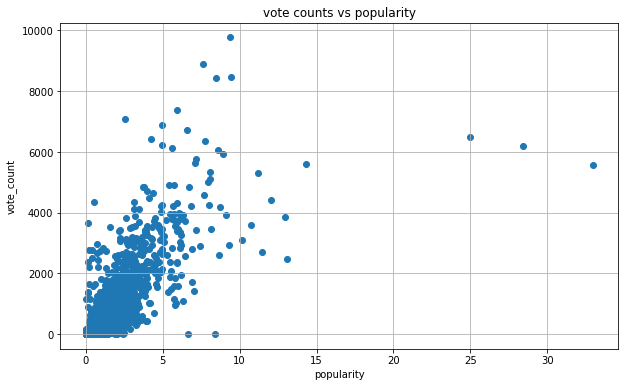

In [32]:
# Plotting of scatterplot showing relationship between vote counts and the popularity of the movie using a defined function

def scatter_plot(x, y, xlabel: str, ylabel: str):
    plt.figure(figsize=(10,6))
    plt.scatter(x, y)
    plt.grid()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
scatter_plot(df['popularity'], df['vote_count'], 'popularity', 'vote_count')
plt.title('vote counts vs popularity')
    

### Description of the plot above

The plot shown above depicts a scatter plot plotted for the vote counts against the popularity of the movies. This plot gives a relationship between the afformentioned variables. From this plot, It is clearly seen that there exist no linear relationship between the vote counts and the popularity of the movies.

### Impact of popularity on revenue

Text(0.5, 1.0, 'revenue vs popularity')

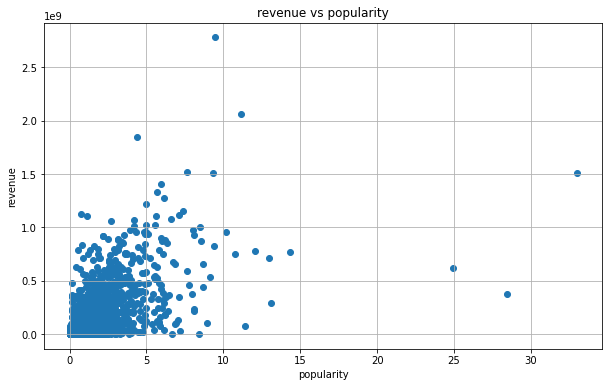

In [33]:
# Plotting a scatterplot of revenue vs popularity  by calling the scatter_plot function

scatter_plot(df['popularity'], df['revenue'], 'popularity', 'revenue')
plt.title('revenue vs popularity')

### Description of the plot above

The plot shown above depicts a scatter plot plotted for the revenue generated from the movies against the popularity of the movies. It hopes to investigate if the popularity of the movies affect the revenue generated from it. It is clearly seen that there exist no linear relationship between the revenue generated from the movies and the popularity of the movies.

### Relationship between budget and revenue

Text(0.5, 1.0, 'revenue vs budget')

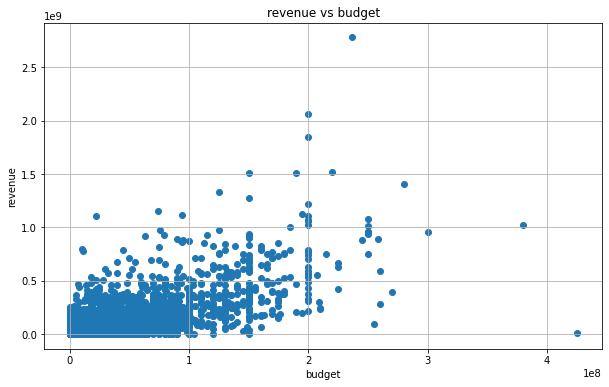

In [34]:
# Plotting a scatterplot showing the relationship between budget and revenue by calling the scatter_plot function

scatter_plot(df['budget'], df['revenue'], 'budget', 'revenue')
plt.title('revenue vs budget')

### Description of the plot above

The plot shown above depicts a scatter plot plotted for the revenue generated from the movies against the budget for the movies. It hopes to investigate if there is a linear relationship between the budgets and the revenues. It is clearly seen that there exist no linear relationship between the revenue generated from the movies and the budget for the movies.

#### Frequency Table showing which movie genres are most popular from year to year

In [35]:
# Creating a frequency table showing movie genres that are popular from year to year

df= df.groupby(['popularity', 'genres', 'release_year'])
df.describe()

id  \
                                                                  count   
popularity genres                                    release_year         
0.000065   Drama|History|Western                     1985           1.0   
0.000188   Mystery|Comedy|Drama                      1971           1.0   
0.000620   Comedy                                    2013           1.0   
0.000973   Comedy|Mystery                            2005           1.0   
0.001115   Comedy                                    2006           1.0   
...                                                                 ...   
13.112507  Adventure|Science Fiction|Thriller        2015           1.0   
14.311205  Action|Science Fiction|Adventure          2014           1.0   
24.949134  Adventure|Drama|Science Fiction           2014           1.0   
28.419936  Action|Adventure|Science Fiction|Thriller 2015           1.0   
32.985763  Action|Adventure|Science Fiction|Thriller 2015           1.0   

                                                                             \
                                                                       mean   
popularity genres                                    release_year             
0.000065   Drama|History|Western                     1985           18729.0   
0.000188   Mystery|Comedy|Drama                      1971           32082.0   
0.000620   Comedy                                    2013          174323.0   
0.000973   Comedy|Mystery                            2005           31329.0   
0.001115   Comedy                                    2006           15412.0   
...                                                                     ...   
13.112507  Adventure|Science Fiction|Thriller        2015          262500.0   
14.311205  Action|Science Fiction|Adventure          2014          118340.0   
24.949134  Adventure|Drama|Science Fiction           2014          157336.0   
28.419936  Action|Adventure|Science Fiction|Thriller 2015           76341.0   
32.985763  Action|Adventure|Science Fiction|Thriller 2015          135397.0   

                                                                       \
                                                                  std   
popularity genres                                    release_year       
0.000065   Drama|History|Western                     1985         NaN   
0.000188   Mystery|Comedy|Drama                      1971         NaN   
0.000620   Comedy                                    2013         NaN   
0.000973   Comedy|Mystery                            2005         NaN   
0.001115   Comedy                                    2006         NaN   
...                                                                ..   
13.112507  Adventure|Science Fiction|Thriller        2015         NaN   
14.311205  Action|Science Fiction|Adventure          2014         NaN   
24.949134  Adventure|Drama|Science Fiction           2014         NaN   
28.419936  Action|Adventure|Science Fiction|Thriller 2015         NaN   
32.985763  Action|Adventure|Science Fiction|Thriller 2015         NaN   

                                                                             \
                                                                        min   
popularity genres                                    release_year             
0.000065   Drama|History|Western                     1985           18729.0   
0.000188   Mystery|Comedy|Drama                      1971           32082.0   
0.000620   Comedy                                    2013          174323.0   
0.000973   Comedy|Mystery                            2005           31329.0   
0.001115   Comedy                                    2006           15412.0   
...                                                                     ...   
13.112507  Adventure|Science Fiction|Thriller        2015          262500.0   
14.311205  Action|Science Fiction|Adventure          2014          118340.0   
24.949134  Adventur

### Description of the Table above

The table created above is a frequency table that explores three important features of the dataset. It groups the 'popularity', 'genres' and 'release_year' columns and gives information on the measures of their central tendency such as mean.  It also gives information on the minimum and maximum values.

In [ ]:
 # Plotting a histogram showing popularity of the movies
plt.figure(figsize=(10,6))
df['popularity'].hist()
plt.xlabel('popularity')
plt.title('Popularity of the movies')


### Description of the plot above

The plot shown above depicts a histogram plotted for the popularity of the movies. It hopes to explore a single variable (popularity) in the data set.

Text(0.5, 1.0, 'Vote counts of the movies')

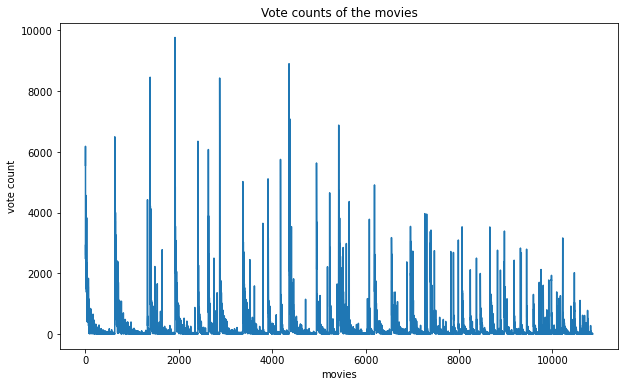

In [13]:
# Plotting a line plot of the vete counts of the movies
plt.figure(figsize=(10,6))
df['vote_count'].plot()
plt.ylabel('vote count')
plt.xlabel('movies')
plt.title('Vote counts of the movies')

### Description of the plot above

The plot shown above depicts a lineplot plotted for the vote counts of the movies. It hopes to explore a single variable (vote counts) in the data set.

Text(0.5, 1.0, 'Popularity Vs Vote count of the movies')

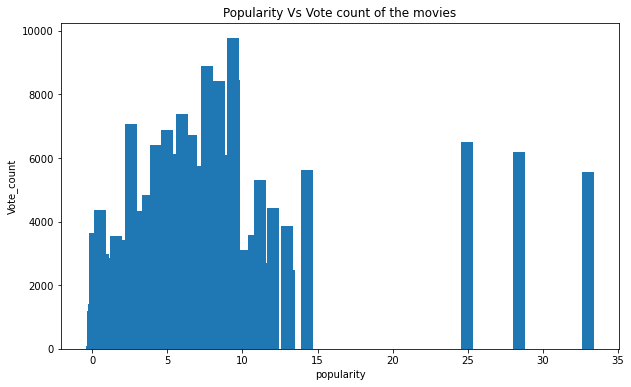

In [26]:
plt.figure(figsize=(10,6))
plt.bar(df['popularity'], df['vote_count'])
plt.xlabel('popularity')
plt.ylabel('Vote_count')
plt.title('Popularity Vs Vote count of the movies')

### Description of the plot above

The plot shown above depicts a bar chart plotted for the vote counts of the movies vs the popularity of the movies. It hopes to explore the relationship between the variable (vote counts) and another variable (popularity) in the data set.

## Conclusions

In the course of this analysis, many investigations and explorations of the dataset were made. In the data cleaning section of the analysis, irrelevant columns were dropped, null entries were found and filled, duplicate entries were found and dropped, and the index of the dataframe was changed. 
In the data exploration section of the analysis, few questions listed at the onset were used to investigate the dataset.

1.	What is the impact of the vote counts on the popularity of the movie?

The impact of the vote counts of the movie and its popularity was investigated using a scattered plot. The analysis on the scattered plot revealed that there exists no relationship between the vote counts and the popularity. No linear regression or correlation between the two data entries were obtained.

2.	What is the relationship between the popularity of the movie and the revenue generated from it?

The relationship between revenue generated from a movie and its popularity was investigated using a scattered plot. The analysis on the scattered plot revealed that there exists no relationship between the revenue generated from the movie and the popularity. No linear regression or correlation between the two data entries were obtained.

3.	Is there a correlation between budget and revenue?

The scattered plot shows that there isn’t a correlation between the budget and the revenue. It was observed from the analysis that each movie produced made a certain amount of profit based on the analysis but no linear relationship between the amount budgeted and the revenue generated was found.

4.	Which movie genres are most popular from year to year?

The Action|Adventure|Science Fiction|Thriller is the most popular movie genre.

### Limitations


One of the limitations observed from this dataset during the course of the data analysis is the inability to get a correlation between two variables in the dataset either negatively or positively. This limitation makes it challenging to come to a reasonable conclusion on the properties that affect the popularity of the movies. 

Another limitation observed during this analysis arose from the limited knwoledge of the data analyst on vast and effective data exploration tools. This limitation can be addressed by investing time and efforts into learning the vital toolset relevant to data analysis.


